# Import data

In [6]:
import pandas as pd
import numpy as np

# Do experiments with one country

In [7]:
df = pd.read_csv("sars_2003_complete_dataset_clean.csv")

China = df[df.Country == "China"]
China = China.drop("Country",axis=1) 
China.columns = ['Date', "cum", "death", "rec"]
China['Date']= pd.to_datetime(China['Date']) 
China['Date'] = China['Date'].apply(lambda x: x.strftime('%m/%d'))
China = China.set_index('Date')
# China.info()

### Data visualisation

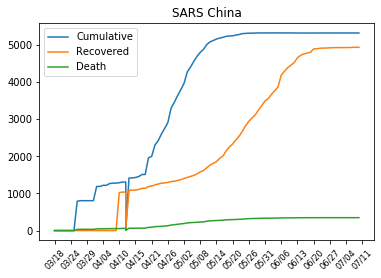

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(df,label,countryName="SARS China"):
    ind = np.arange(0,len(China),5)
    indNames = [China.index[i] for i in range(len(China)) if i %5 ==0]

    plt.plot(df,label=label)
    plt.xticks(ind,indNames, rotation=45,fontsize='small');
    plt.legend()
    plt.title(countryName)
#     plt.show()

cum = China.cum
rec = China.rec
death = China.death
plot_data(cum,"Cumulative")
plot_data(rec, "Recovered")
plot_data(death, "Death")

# Do predictions

In [ ]:
index = np.arange(1,len(China)+1)
China = China.set_index(index)

cum = China.cum
rec = China.rec
death = China.death

In [110]:
!sudo pip3 install statsmodels

    100% |████████████████████████████████| 8.7MB 156kB/s ta 0:00:011
    100% |████████████████████████████████| 235kB 2.2MB/s ta 0:00:01


In [112]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset

# fit model
model = AR(cum)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(cum), len(cum))
print(yhat)

96    5333.410715
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


# MA

In [119]:
data

Date
03/18       0
03/19       0
03/20       0
03/21       0
03/22       0
         ... 
07/07    5327
07/08    5327
07/09    5327
07/10    5327
07/11    5327
Name: cum, Length: 96, dtype: int64

In [189]:
from statsmodels.tsa.arima_model import ARMA
from random import random

cum = China.cum
rec = China.rec
death = China.death
data = rec

# MA example
def reset_index(df):
    index = np.arange(1,len(df)+1)
    df = df.set_index(index)
    return df

def model(data):
    # fit model
    model = ARMA(data, order=(0, 1))
    model_fit = model.fit(disp=False)
    yhat = model_fit.predict(len(data), len(data))
    newdata = pd.DataFrame([pd.Series([int(yhat)])])
    data = pd.concat([data,newdata])
    data = reset_index(data)
#     print(data)
    return data 

for i in range(100):
    data = model(data)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


AttributeError: 'ARMAResults' object has no attribute 'get_forecast'

In [185]:
data

,0
1,0
2,0
3,0
4,0
5,0
...,...
192,3563
193,3563
194,3563
195,3563


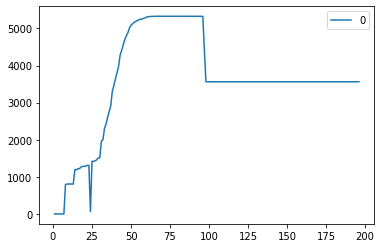

In [186]:
data.plot()

# SARIMA

In [196]:
China

,Date,cum,death,rec
1,2003-03-18,0,0,0
2,2003-03-19,0,0,0
3,2003-03-20,0,0,0
4,2003-03-21,0,0,0
5,2003-03-22,0,0,0
...,...,...,...,...
92,2003-07-07,5327,348,4934
93,2003-07-08,5327,348,4934
94,2003-07-09,5327,348,4939
95,2003-07-10,5327,348,4941


In [213]:
from statsmodels.tsa.arima_model import ARMA
from random import random
import statsmodels.api as sm


# cum = China.cum
# rec = China.rec
# death = China.death
# data = rec

data = China.cum
# data.index = pd.period_range(start='2003-03-18', end='2003-07-11', freq='M')

# # Construct the model
# mod = sm.tsa.SARIMAX(data, order=(1, 0, 0), trend='c')
# # Estimate the parameters
# res = mod.fit()

# print(res.summary())
print(res.forecast(steps=100))

# Here we construct a more complete results object.
fcast_res1 = res.get_forecast()

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
# print(fcast_res1.summary_frame(alpha=0.010))

96     4932.370388
97     4923.770485
98     4915.200188
99     4906.659394
100    4898.148004
          ...     
191    4234.513180
192    4228.315713
193    4222.139581
194    4215.984711
195    4209.851030
Length: 100, dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [208]:
print(fcast_res1.summary_frame(alpha=0.10))


rec         mean     mean_se  mean_ci_lower  mean_ci_upper
96   4932.370388  192.850985    4615.158746     5249.58203
